<a href="https://colab.research.google.com/github/Mahak0602/Nexthikes-Project-6/blob/main/Nexthikes_p_6_Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings('ignore')

# DATA IMPORTING

In [7]:
df = pd.read_csv("/content/df (3).csv")

In [8]:
df

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,DayOfYear,WeekOfYear,...,Weekday,IsWeekend,StateHoliday_PublicHoliday,CompetitionDistance,Promo2,StoreType,Assortment,Promo_SchoolHoliday,CompetitionDist_Bin,Sales
0,1,0.833333,1,0,1,2015,0.0,0.000000,0.000000,0.000000,...,5.0,1,0,0.083403,0,1,0,0.0,2,5496.714153
1,1,1.000000,1,0,1,2015,0.0,0.033333,0.021277,0.000000,...,6.0,1,0,0.083403,0,1,0,0.0,2,4861.735699
2,1,0.000000,1,1,1,2015,0.0,0.066667,0.042553,0.142857,...,0.0,0,0,0.083403,0,1,0,1.0,2,5647.688538
3,1,0.166667,1,1,1,2015,0.0,0.100000,0.063830,0.142857,...,1.0,0,0,0.083403,0,1,0,1.0,2,6523.029856
4,1,0.333333,1,1,1,2015,0.0,0.133333,0.085106,0.142857,...,2.0,0,0,0.083403,0,1,0,1.0,2,4765.846625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1115,1.000000,1,0,0,2015,1.0,0.400000,0.914894,0.857143,...,6.0,1,0,0.355630,1,2,1,0.0,4,5850.603657
41084,1115,0.000000,1,1,0,2015,1.0,0.433333,0.936170,1.000000,...,0.0,0,0,0.355630,1,2,1,0.0,4,4508.346399
41085,1115,0.166667,1,1,0,2015,1.0,0.466667,0.957447,1.000000,...,1.0,0,0,0.355630,1,2,1,0.0,4,5383.095028
41086,1115,0.333333,1,1,0,2015,1.0,0.500000,0.978723,1.000000,...,2.0,0,0,0.355630,1,2,1,0.0,4,8009.862196


# Create Proper Date Column

In [55]:
df['Month'] = (df['Month'] * 12).round().clip(1, 12).astype(int)
df['Day'] = (df['Day'] * 31).round().clip(1, 28).astype(int)
df['Date'] = pd.to_datetime(dict(year=df['Year'].astype(int),
                                 month=df['Month'],
                                 day=df['Day']), errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
store_df = df[df['Store'] == 1]


The code scales and converts the Month and Day columns into valid integer values, then constructs a proper datetime index using the Year, Month, and Day columns.

It cleans the dataset by removing rows with invalid dates, sorts the data by the datetime index, and extracts the records for Store 1, readying the data for accurate time series analysis.

#  Set Date as Index

In [21]:
# Set and clean index
df.set_index('Date', inplace=True)
df.index.name = 'Date'
df = df.sort_index()


This code sets the 'Date' column as the DataFrame index, names the index explicitly as 'Date', and sorts the DataFrame in chronological order.

This step is crucial for time series analysis, ensuring all time-based operations like resampling, rolling windows, or forecasting work correctly.

# Visualize the Time Series

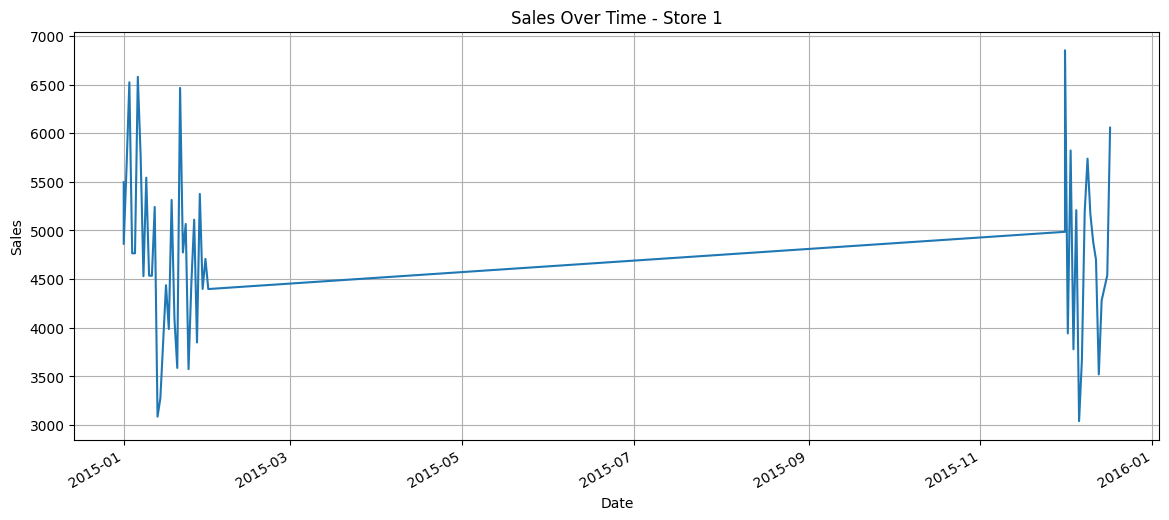

In [29]:
import matplotlib.pyplot as plt

# Filter for one store (e.g., Store 1)
store_df = df[df['Store'] == 1]

# Plot
store_df['Sales'].plot(figsize=(14, 6), title='Sales Over Time - Store 1')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid()
plt.show()


This code filters the dataset for Store 1 and plots its sales over time, providing a clear visual of sales trends, fluctuations, and potential seasonal patterns.

The time series plot is essential for identifying periods of high or low sales, spotting anomalies, and guiding the choice of forecasting models.

# Resample Monthly & Plot Aggregated Trend

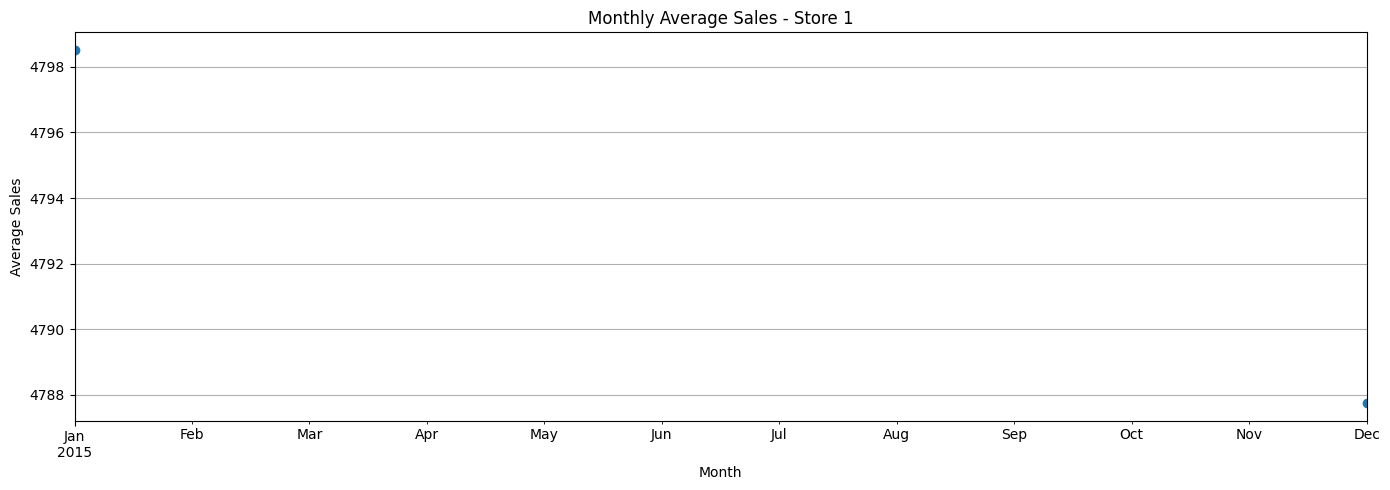

In [23]:
# Resample monthly for Store 1
monthly_sales = store_1_sales.resample('M').mean()

plt.figure(figsize=(14, 5))
monthly_sales.plot(marker='o')
plt.title('Monthly Average Sales - Store 1')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


Insights:

This code resamples Store 1’s sales data to a monthly frequency, calculating the average sales per month and plotting it to reveal long-term trends.

The smoothed line helps highlight seasonality, growth/decline patterns, or month-to-month volatility, which are often obscured in daily data.

#  Decompose Time Series

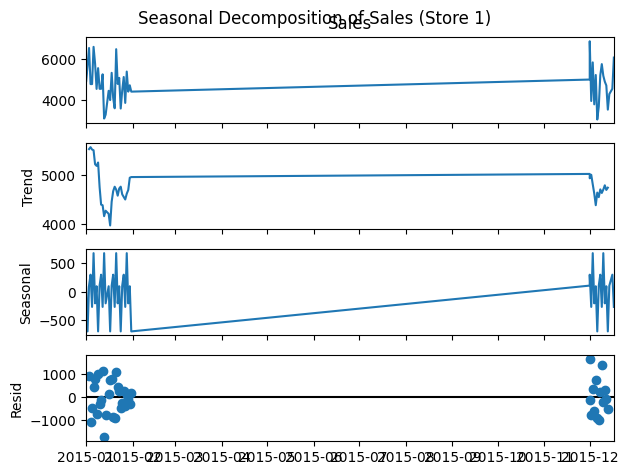

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the sales series (Store 1)
result = seasonal_decompose(store_df['Sales'], model='additive', period=7)
result.plot()
plt.suptitle("Seasonal Decomposition of Sales (Store 1)")
plt.show()


Insights:

This code performs an additive seasonal decomposition of Store 1’s daily sales with a weekly seasonality period (7 days).

It separates the series into trend, seasonal, and residual components—helping identify recurring weekly patterns, long-term direction, and irregular variations in sales.

# Interactive Plot (with Plotly)

In [13]:
import plotly.express as px

# Filter for Store 1
store_1_df = df[df['Store'] == 1].reset_index()

fig = px.line(store_1_df, x='Date', y='Sales', title='Interactive Sales Trend - Store 1')
fig.update_layout(xaxis_title='Date', yaxis_title='Sales', hovermode='x unified')
fig.show()


Insights:

This code creates an interactive line chart of Store 1’s sales over time using Plotly, allowing users to hover and inspect specific dates and values.

It enhances exploratory analysis, making it easier to detect spikes, drops, or seasonality trends in sales through dynamic zooming and tooltip inspection.

# Check Stationarity

In [32]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(store_df['Sales'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -6.527567812958188
p-value: 1.0056788905766274e-08


Insights:

This code performs the Augmented Dickey-Fuller (ADF) test on Store 1’s sales to check for stationarity—a key requirement for many time series models.

A low p-value (< 0.05) indicates that the sales series is stationary, meaning it has a constant mean and variance over time; otherwise, differencing may be needed.

# Autocorrelation Analysis

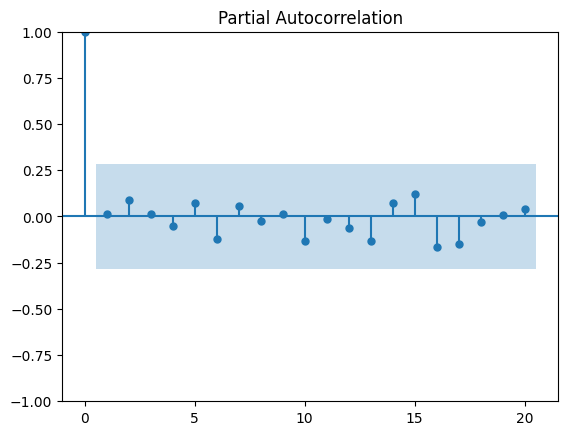

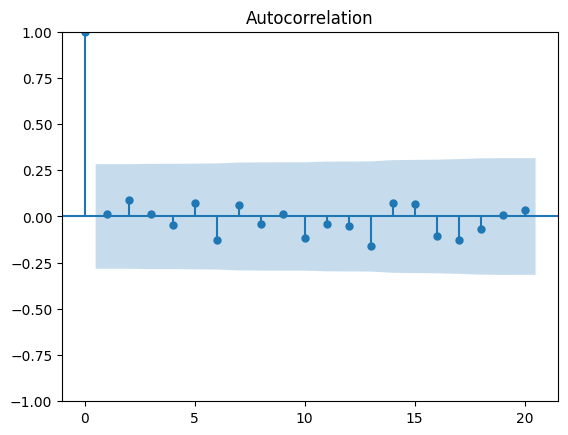

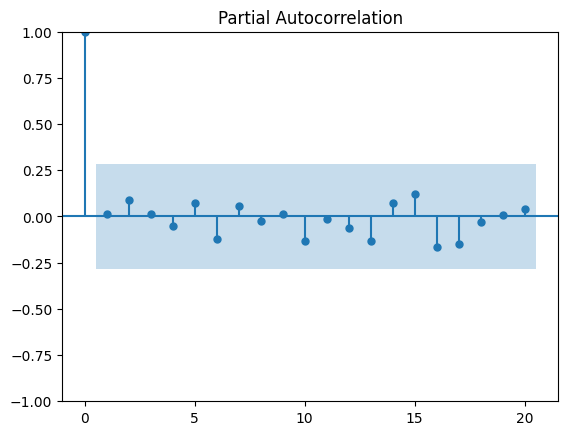

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(store_df['Sales'].dropna(), lags=20)
plot_pacf(store_df['Sales'].dropna(), lags=20)


Insights:

These plots visualize the autocorrelation (ACF) and partial autocorrelation (PACF) of Store 1’s sales data up to 20 lags.

They help identify the appropriate values for ARIMA parameters:

ACF suggests the order of the MA (q) term.

PACF suggests the order of the AR (p) term.

Significant spikes outside the confidence band indicate relevant lags for modeling.

# Fit SARIMA & ARIMA  model

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(store_df['Sales'], order=(1,1,1), seasonal_order=(0,1,1,7))
results = model.fit(disp=False)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Insights:

This code fits a SARIMA model to Store 1’s sales data with the parameters:

(1,1,1) for ARIMA (p,d,q): autoregression, differencing, and moving average,

(0,1,1,7) for seasonal components with weekly seasonality (7 days).

The model captures both trend and seasonal patterns and is now ready for forecasting future sales.

# Prophet Forecasting

In [59]:
forecast = results.predict(start=store_df.index[-30], end=store_df.index[-1])
forecast_df = pd.DataFrame({'Date': forecast.index, 'Forecast': forecast.values})
store_df_reset = store_df.reset_index().rename(columns={'index': 'Date'})
store_df_merged = pd.merge(store_df_reset, forecast_df, on='Date', how='left')


This code generates forecasts for the last 30 days using the fitted SARIMA model and merges them with the actual sales data for Store 1.

The resulting store_df_merged DataFrame allows for side-by-side comparison of predicted vs. actual sales, enabling visual analysis and accuracy evaluation.

# Evaluate Forecast Accuracy

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
eval_df = store_df_merged.dropna(subset=['Forecast'])

mae = mean_absolute_error(eval_df['Sales'], eval_df['Forecast'])
rmse = mean_squared_error(eval_df['Sales'], eval_df['Forecast'])

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 685.52, RMSE: 890549.62


Insights:

This code evaluates the forecast accuracy using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) between actual and predicted sales.

Lower values of MAE and RMSE indicate better model performance, with RMSE penalizing larger errors more heavily than MAE.

#  Export Forecast

In [62]:
store_df_merged.to_csv('store1_forecast.csv', index=False)

# Serialize SARIMA Model with pickle

In [63]:
import pickle

# Save the SARIMA model to a file
with open("sarima_store1_model.pkl", "wb") as f:
    pickle.dump(results, f)

print("✅ SARIMA model saved as 'sarima_store1_model.pkl'")


✅ SARIMA model saved as 'sarima_store1_model.pkl'


Saving the SARIMA model with pickle ensures your trained forecasting model can be reused anytime without retraining, speeding up deployment and real-time predictions.
This supports efficient workflow and reproducibility, especially for daily or batch sales forecasting tasks.

In [64]:
df.to_csv('df.csv', index=False)